In [1]:
from weavepy import *

In [2]:
# Parameters
## Climate
climate_variable = "2m_temperature"
climate_variable_comparison = '<=' # '<', '<=', '>', or '>='
climate_variable_threshold = 0 # Number in units of variable
## Energy 
energy_variable = "solar_generation_capacity_factor"
energy_variable_comparison = '<' # '<', '<=', '>', or '>='
energy_variable_threshold = 0.5 # Number in units of variable
##Geography
country = "FR"

In [3]:
# Load data
climate = {}
period = "historical"
climate[period] = get_data(variable=climate_variable, period=period, verbose = False)[country]
period = "future"
for model in ["cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"]:
    climate[model] = get_data(variable=climate_variable, period=period, model = model, verbose = False)[country]

In [4]:
# Load data
energy = {}
period = "historical"
energy[period] = get_data(variable=energy_variable, period=period, verbose = False)[country]
period = "future"
for model in ["cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"]:
    energy[model] = get_data(variable=energy_variable, period=period, model = model, verbose = False)[country]

In [5]:
# Aggregate
climate_daily = {}
for a in ["historical", "cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"]:
    climate_daily[a] = climate[a].groupby(climate[a].index.floor('d')).mean()
energy_daily = {}
for a in ["historical", "cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"]:
    energy_daily[a] = energy[a].groupby(energy[a].index.floor('d')).mean()

In [13]:
# Identify problematic events
pb_days = {}
for a in ["historical", "cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"]:
    pb_days[a] = identify_problematic_events(climate_daily[a], energy_daily[a], 
                                             climate_variable_comparison, climate_variable_threshold,
                                energy_variable_comparison, energy_variable_threshold)

In [15]:
# Identify events
events = {}
for a in ["historical", "cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"]:
    events[a] = find_events(pb_days[a])

In [16]:
# period length
period_len = {}
for a in ["historical", "cmcc_cm2_sr5", "mpi_esm1_2_hr", "ec_earth3"]:
    period_len[a] = len(np.unique(climate[a].index.year))

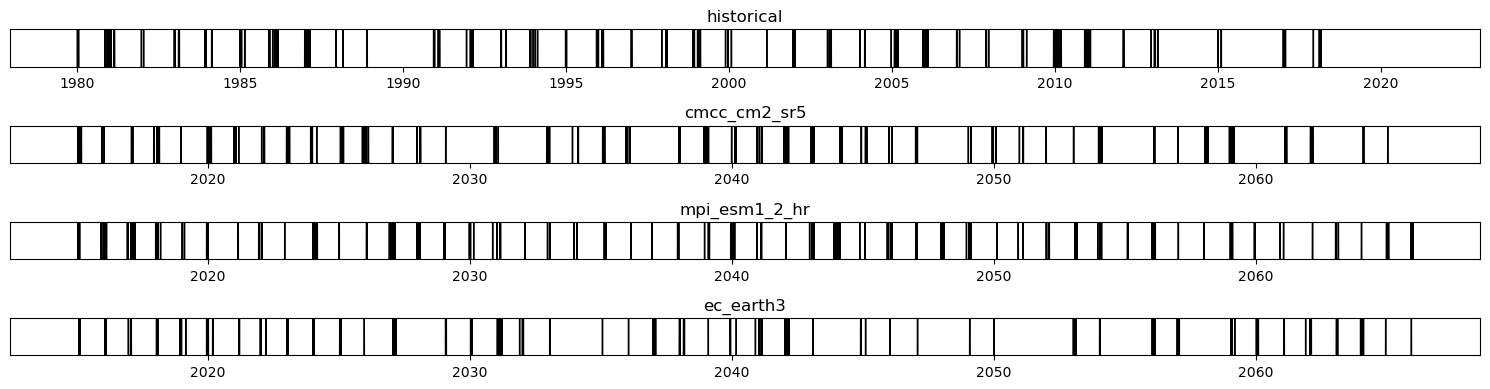

In [17]:
# Plot
palette = {"historical":"k"}
## Plot individual events
fig, axs = plt.subplots(len(pb_days), figsize = [15,4])
for i, a in enumerate(pb_days):
    event_stripplot(pb_days[a], axs[i], a, 'k')
fig.tight_layout()

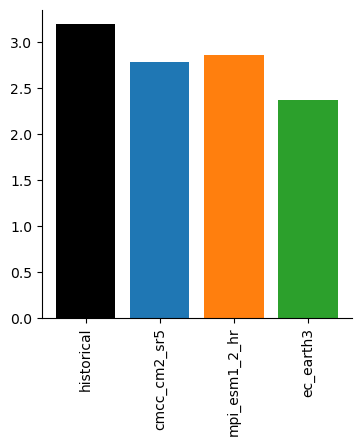

In [18]:
fig = plt.figure(figsize = (4,4))
ax_nb_events = fig.add_subplot(111)
nb_events_barplot(events, period_len, ax_nb_events, palette)

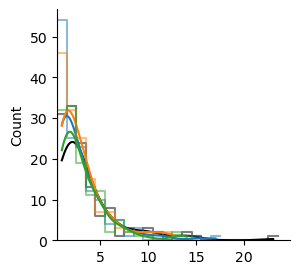

In [19]:
fig = plt.figure(figsize = (3,3))
ax_duration = fig.add_subplot(111)
event_duration_histplot(events, ax_duration, palette, legend = False)

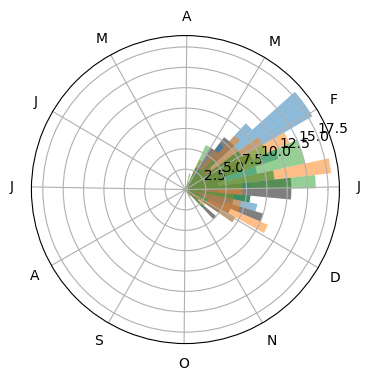

In [20]:
fig = plt.figure(figsize = (4,4))
ax_season = fig.add_subplot(111, projection = "polar")
event_seasonnality_histplot(events, ax_season, palette, legend = False)